# KNN - K nearest neighbours

In [26]:
from sklearn.datasets import load_wine
import pandas as pd

wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [27]:
pd.DataFrame(wine["data"])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [28]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [29]:
wine["target"].shape, wine["data"].shape

((178,), (178, 13))

In [30]:
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
#df = pd.concat([df, pd.DataFrame(wine.target, columns=["wine_class"])], axis=1)
# funkar om wine.target är samma längd som df
df["wine_class"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  wine_

In [32]:
df.describe().T.drop("count", axis=1)

,mean,std,min,25%,50%,75%,max
alcohol,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## Correlation heatmap for feature selection / feature engineering

<Axes: >

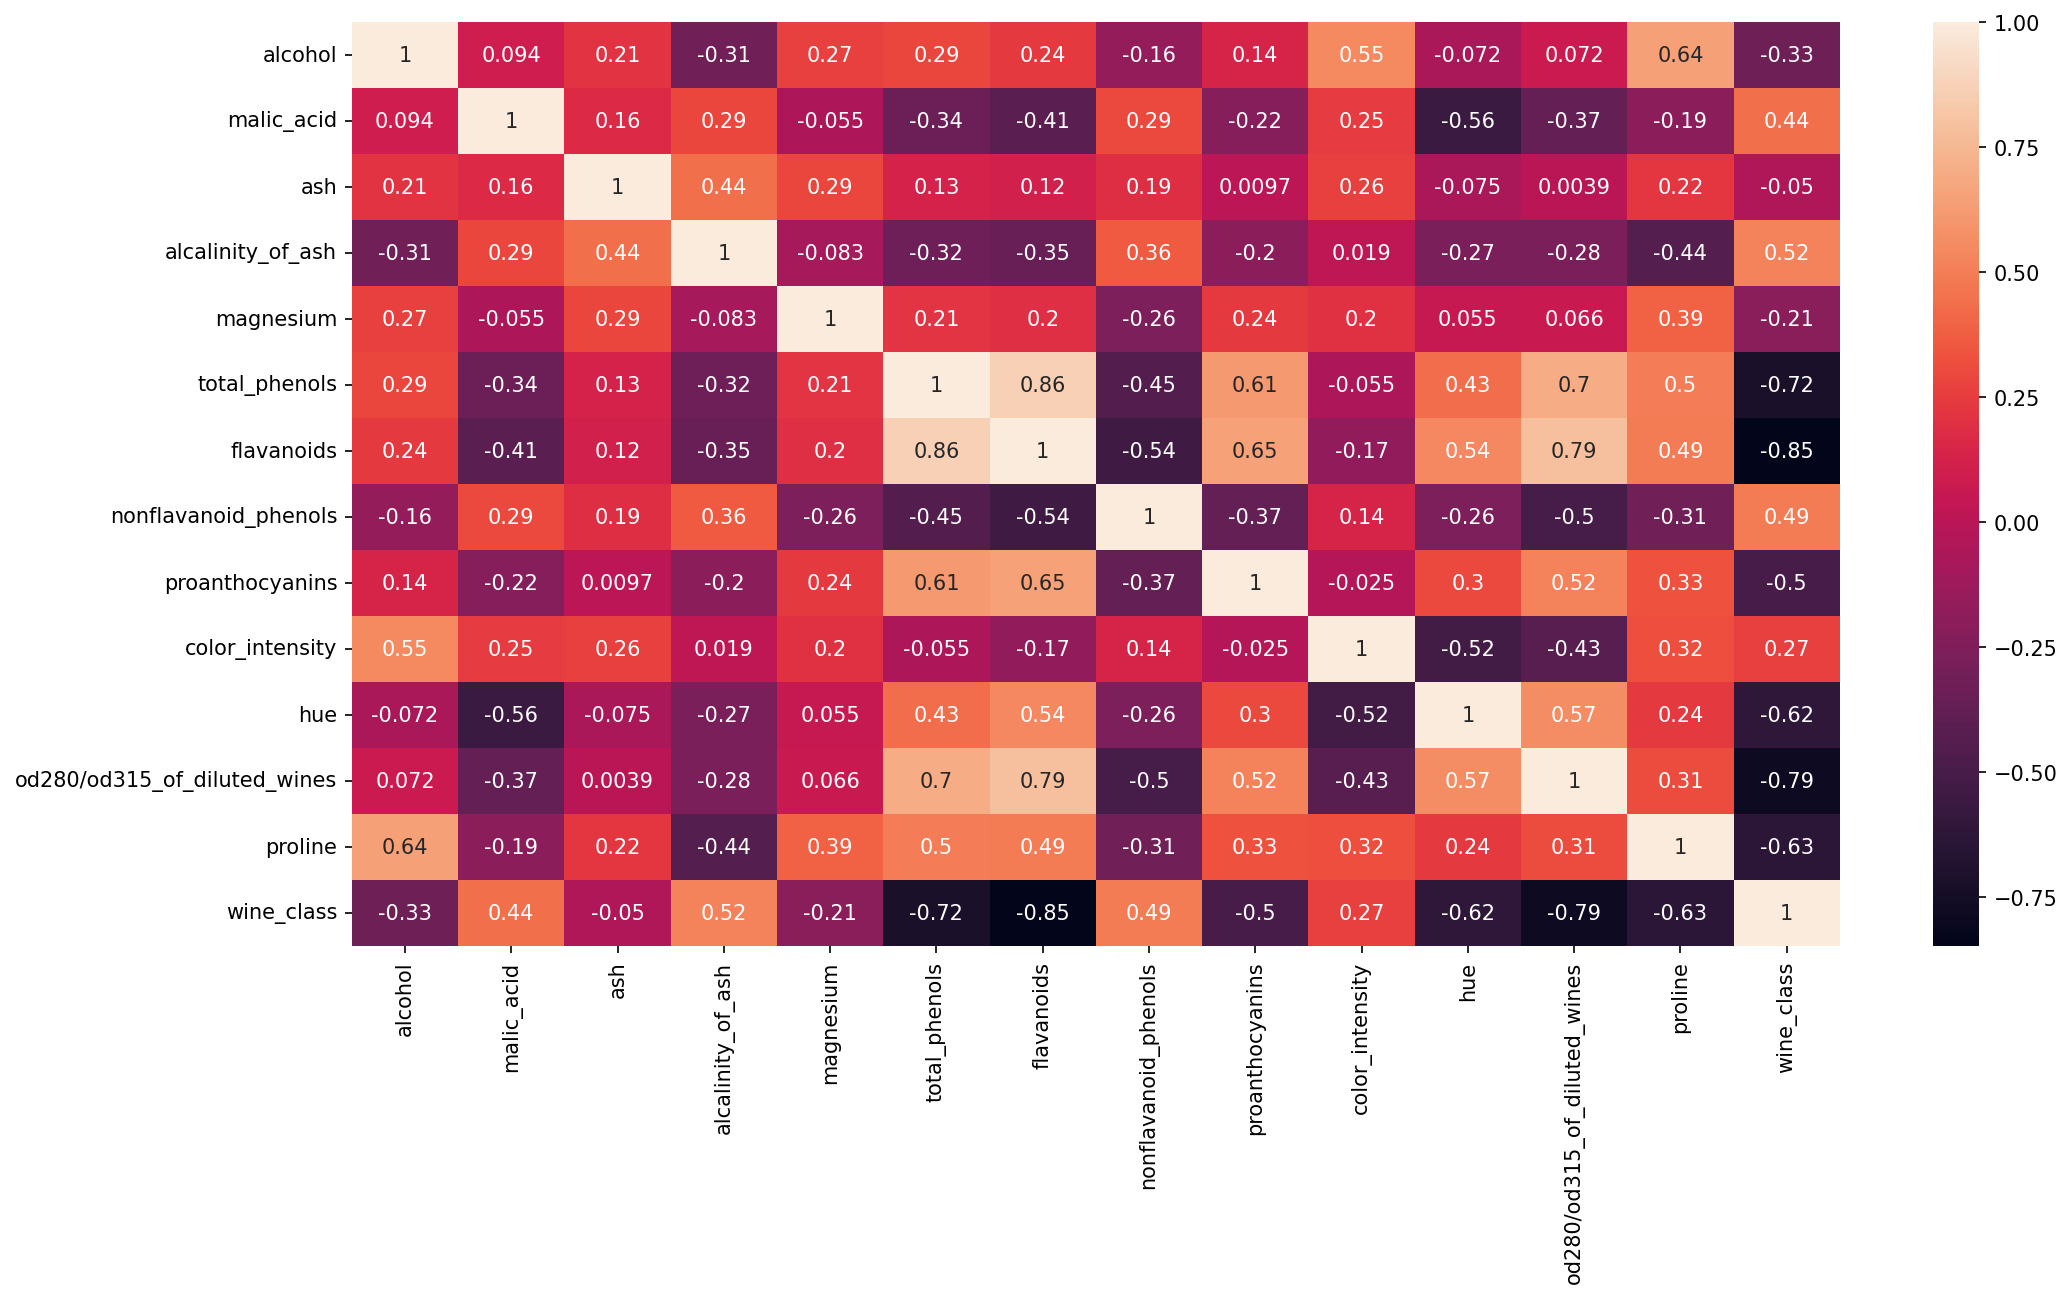

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(16, 8), dpi=150)

sns.heatmap(df.corr(), annot=True)

In [34]:
df = df.drop(["ash", "total_phenols", "magnesium"], axis=1)
df

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,20.5,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,23.0,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,20.0,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,20.0,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


## KNN

In [38]:
X, y = df.drop("wine_class", axis="columns"), df["wine_class"]
X.head()

,alcohol,malic_acid,alcalinity_of_ash,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,15.6,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,11.2,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,18.6,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,16.8,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,21.0,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: wine_class, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train.min(), scaled_X_train.max(), scaled_X_test.min(), scaled_X_test.max()

(np.float64(0.0),
 np.float64(1.0),
 np.float64(-0.05077262693156731),
 np.float64(1.2428256070640176))

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2,
       1])

In [48]:
y_test.values

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.97      0.94      0.96        34
           2       0.96      1.00      0.98        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



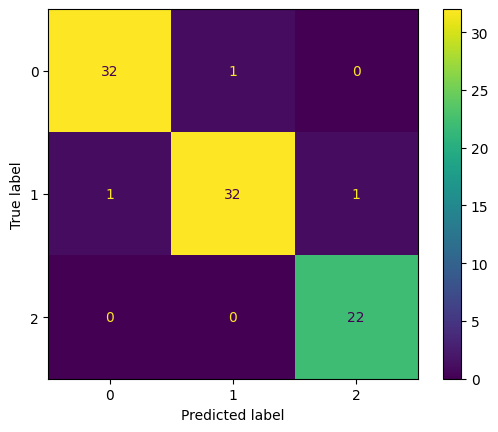

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();